In [1]:
import httpimport

In [2]:
import sys
with httpimport.github_repo('MimaxSimm', 'trPL_Analysis', ref='master'):
    import trPL_importClass

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import isfile, join
from importlib import reload

In [5]:
# Encapsulation seems to hold, if done PROPERLY

trPLs = trPL_importClass.trPL_measurement_series(r"./Data/250721", BG = 1.42, thickness = 400e-9, TRPL_denoise = True, mode = "HySprint", retime = True, importPL=True)
trPLs.TRPLs_files

Lambda Laser set to: 7.050000e-07
Spot diameter set to: 2.720000e-04
Film thickness set to: 4.000000e-07
Beam dump ratio set to: 2.100000e-01
BG, Nc and Nv set to:1.42 2e+18 2e+18
['00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat', '01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat', '02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat', '03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat', '04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat']


['00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat',
 '01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat',
 '02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat',
 '03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat',
 '04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat']

In [6]:
trPLs.TRPL_binsize

[np.float64(2.5e-10),
 np.float64(2e-09),
 np.float64(2e-09),
 np.float64(1e-09),
 np.float64(1e-09)]

In [7]:
# Encapsulation seems to hold, if done PROPERLY

trPLs2 = trPL_importClass.trPL_measurement_series(r"./Data/250820", BG = 1.42, thickness = 400e-9, TRPL_denoise = True, mode = "HySprint", retime = True, importPL=True)
trPLs2.TRPLs_files

Lambda Laser set to: 7.050000e-07
Spot diameter set to: 2.720000e-04
Film thickness set to: 4.000000e-07
Beam dump ratio set to: 2.100000e-01
BG, Nc and Nv set to:1.42 2e+18 2e+18
['00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat', '01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat', '02-M13Q03_10kHz-ND1-0.403uW-300s_2ns.dat', '03-M13Q01_10kHz-ND1-0.403uW-300s_2ns.dat', '04-M13Q02_10kHz-ND1-0.403uW-300s_2ns.dat', '05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat', '06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat']


['00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat',
 '01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat',
 '02-M13Q03_10kHz-ND1-0.403uW-300s_2ns.dat',
 '03-M13Q01_10kHz-ND1-0.403uW-300s_2ns.dat',
 '04-M13Q02_10kHz-ND1-0.403uW-300s_2ns.dat',
 '05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat',
 '06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat']

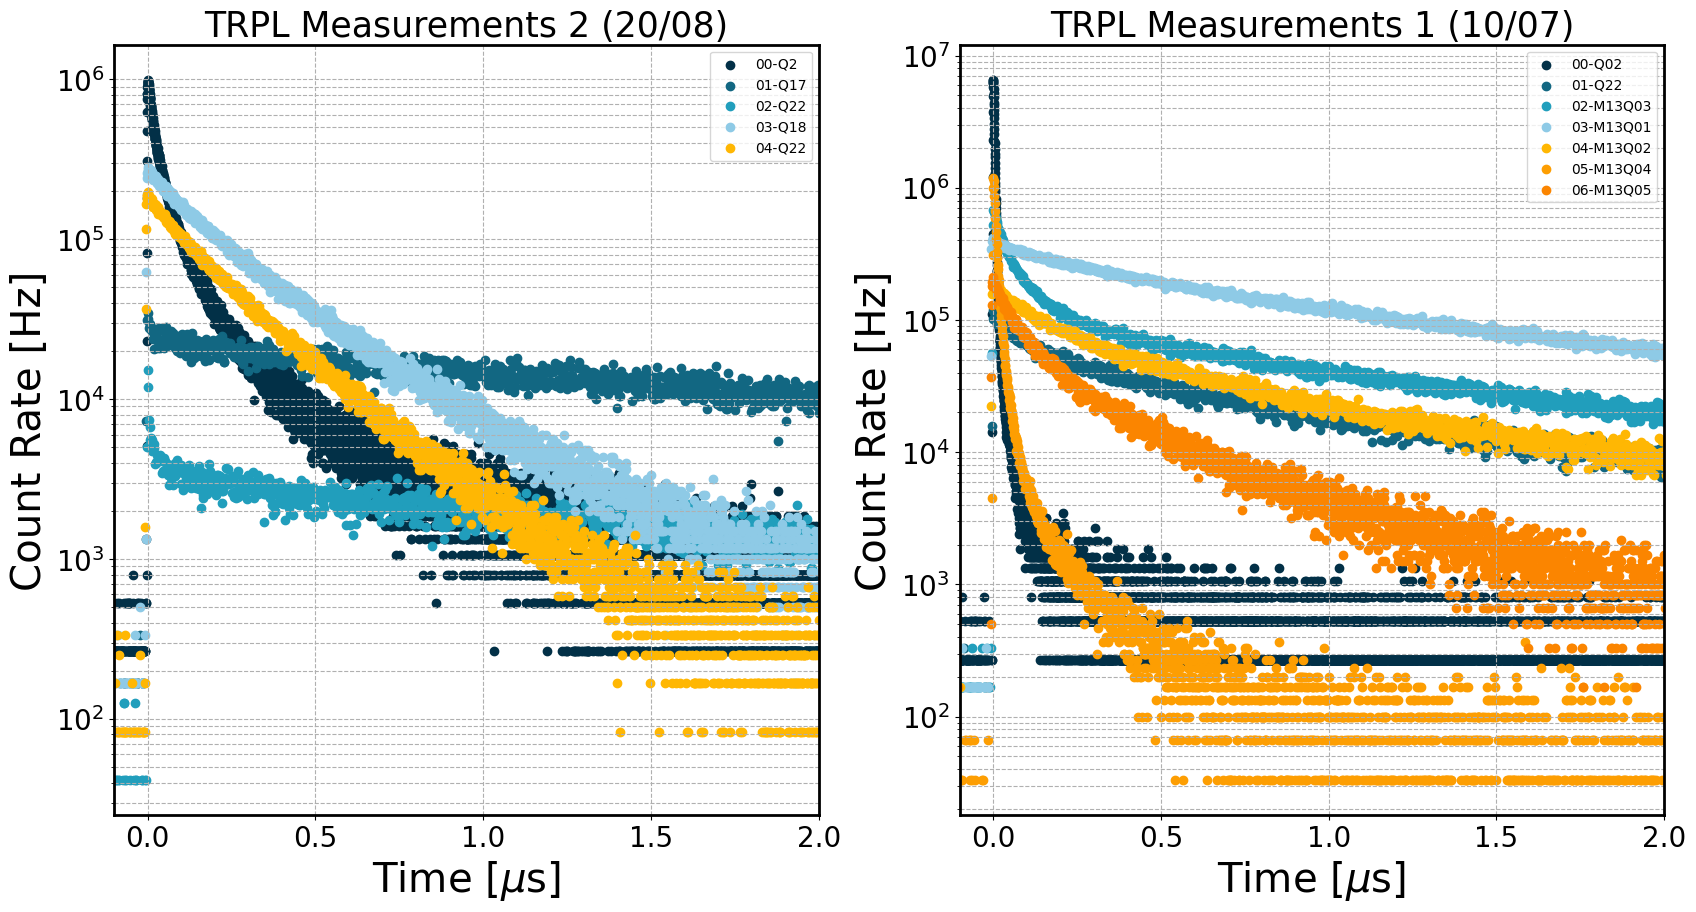

In [13]:
#Plot series
fig, ax = plt.subplots(1,2, figsize = (20,10))
idx_start = 3501
palette = ['#023047', '#126782', '#219EBC', '#8ECAE6', '#FFB703', '#FD9E02', '#FB8500', '#023047', '#126782', '#126782']

legend = ["10us", "100us", "1ms", "3ms", "10us"]

BG = []
selection = [2,0,3,1]
for i, (sPL) in enumerate(range(7)):
    if(i<5):
        ax[0].scatter(1e6*(trPLs.TRPLs_ts[:,i]), trPLs.TRPLs_subsMean[:,i], color = palette[i], label = trPLs.TRPL_sample[sPL], alpha = 1)
    ax[1].scatter(1e6*(trPLs2.TRPLs_ts[:,sPL]), trPLs2.TRPLs_subsMean[:,sPL], color = palette[i], label = trPLs2.TRPL_sample[sPL], alpha = 1)

ax[0].set_title('TRPL Measurements 2 (20/08)', fontsize=25)
ax[1].set_title('TRPL Measurements 1 (10/07)', fontsize=25)


for a in ax:
    a.set_xlim([-0.1,2])
    #a.set_ylim([1, 1e7])
    a.set_yscale("log")
    a.set_xscale("linear")
    axis_fontsize = 29
    a.set_ylabel("Count Rate [Hz]", fontsize=axis_fontsize) 
    a.set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize) 
    a.legend()
    axisTicks_fontsize = 20
    a.tick_params(axis='x', labelsize=axisTicks_fontsize)
    a.tick_params(axis='y', labelsize=axisTicks_fontsize)
    
    a.grid(visible = True, which = 'both', linestyle = '--')

    w_frame = 2
    a.spines["bottom"].set_linewidth(w_frame)
    a.spines["top"].set_linewidth(w_frame)
    a.spines["left"].set_linewidth(w_frame)
    a.spines["right"].set_linewidth(w_frame)

fig.savefig("./trPLs-results.jpg")

Number of exponentials for fit used is = [8, 8, 8, 8, 8]

1.30e+15
1.28e+15
1.28e+15
1.28e+15
1.28e+15


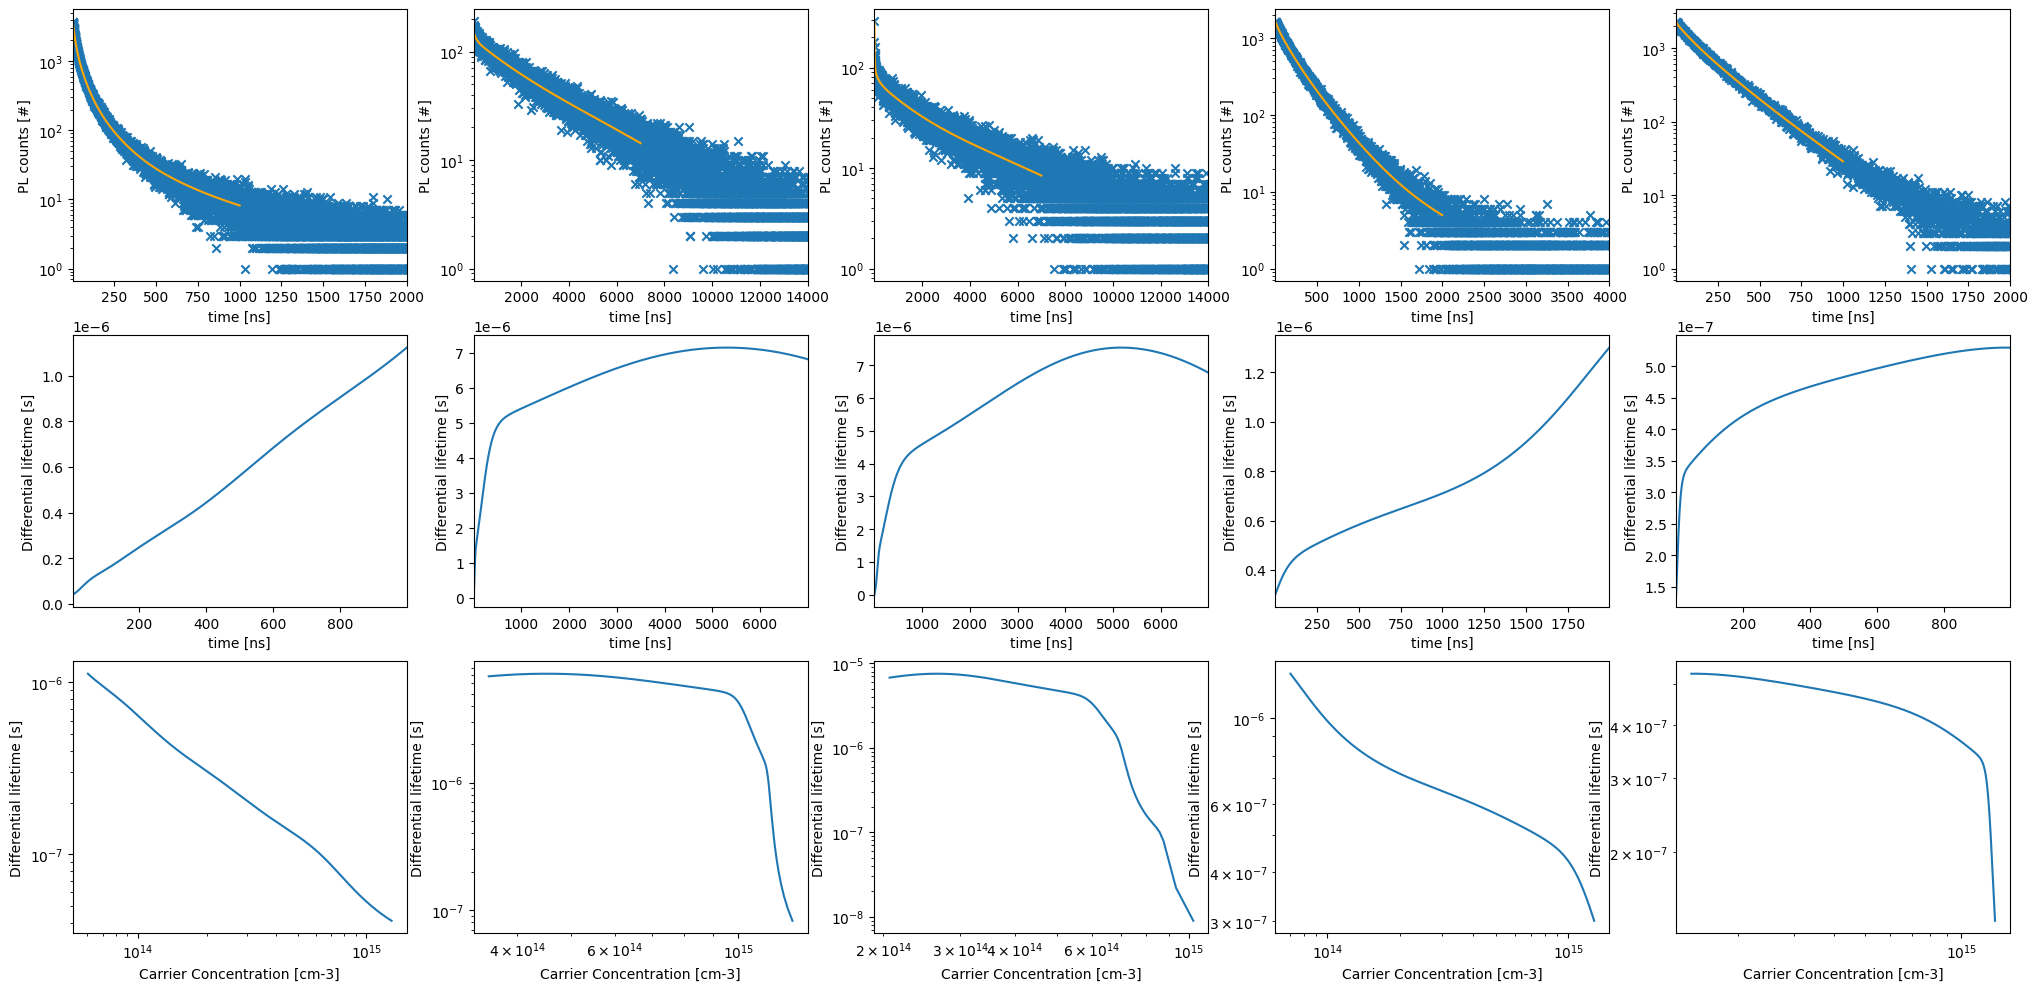

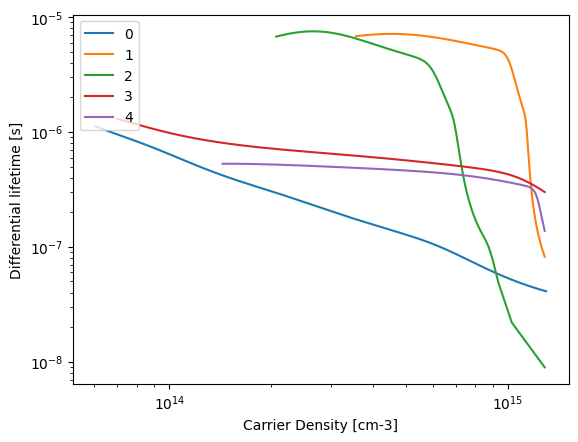

In [19]:
#Differential lifetimes
l = [1000,7000,7000,2000,1000]
n_exp = [8 for i in trPLs.n0s]

times1, densities1, taudiffs1 = trPLs.fit_difflifetimes(n_exp=n_exp, l2=l)

Number of exponentials for fit used is = [8, 8, 8, 8, 8, 8, 8]

1.30e+15
1.29e+15
1.29e+15
1.29e+15
1.29e+15
1.30e+15
1.30e+15


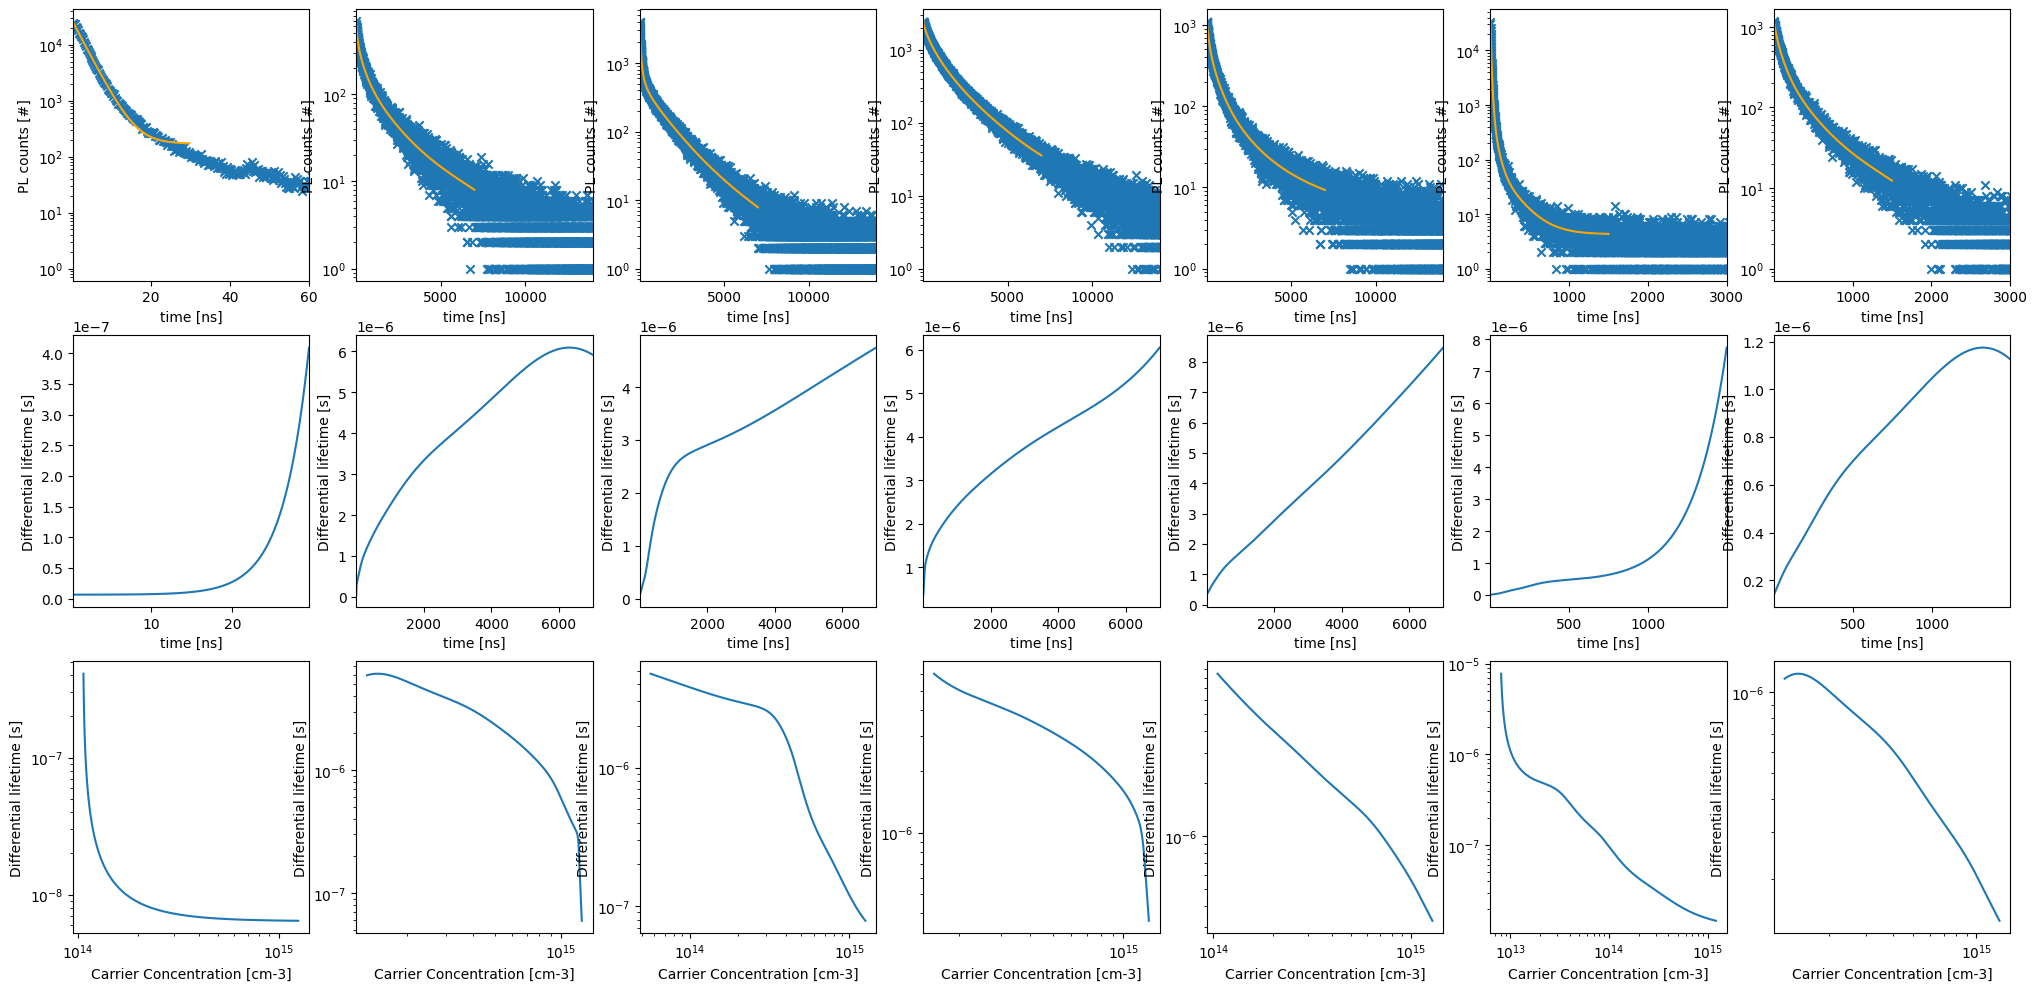

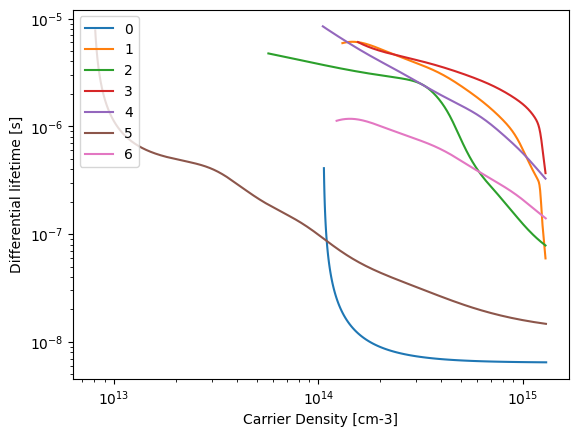

In [23]:
#Differential lifetimes
l = [30,7000,7000,7000,7000, 1500,1500]
n_exp = [8 for i in trPLs2.n0s]

times2, densities2, taudiffs2 = trPLs2.fit_difflifetimes(n_exp=n_exp, l2=l)

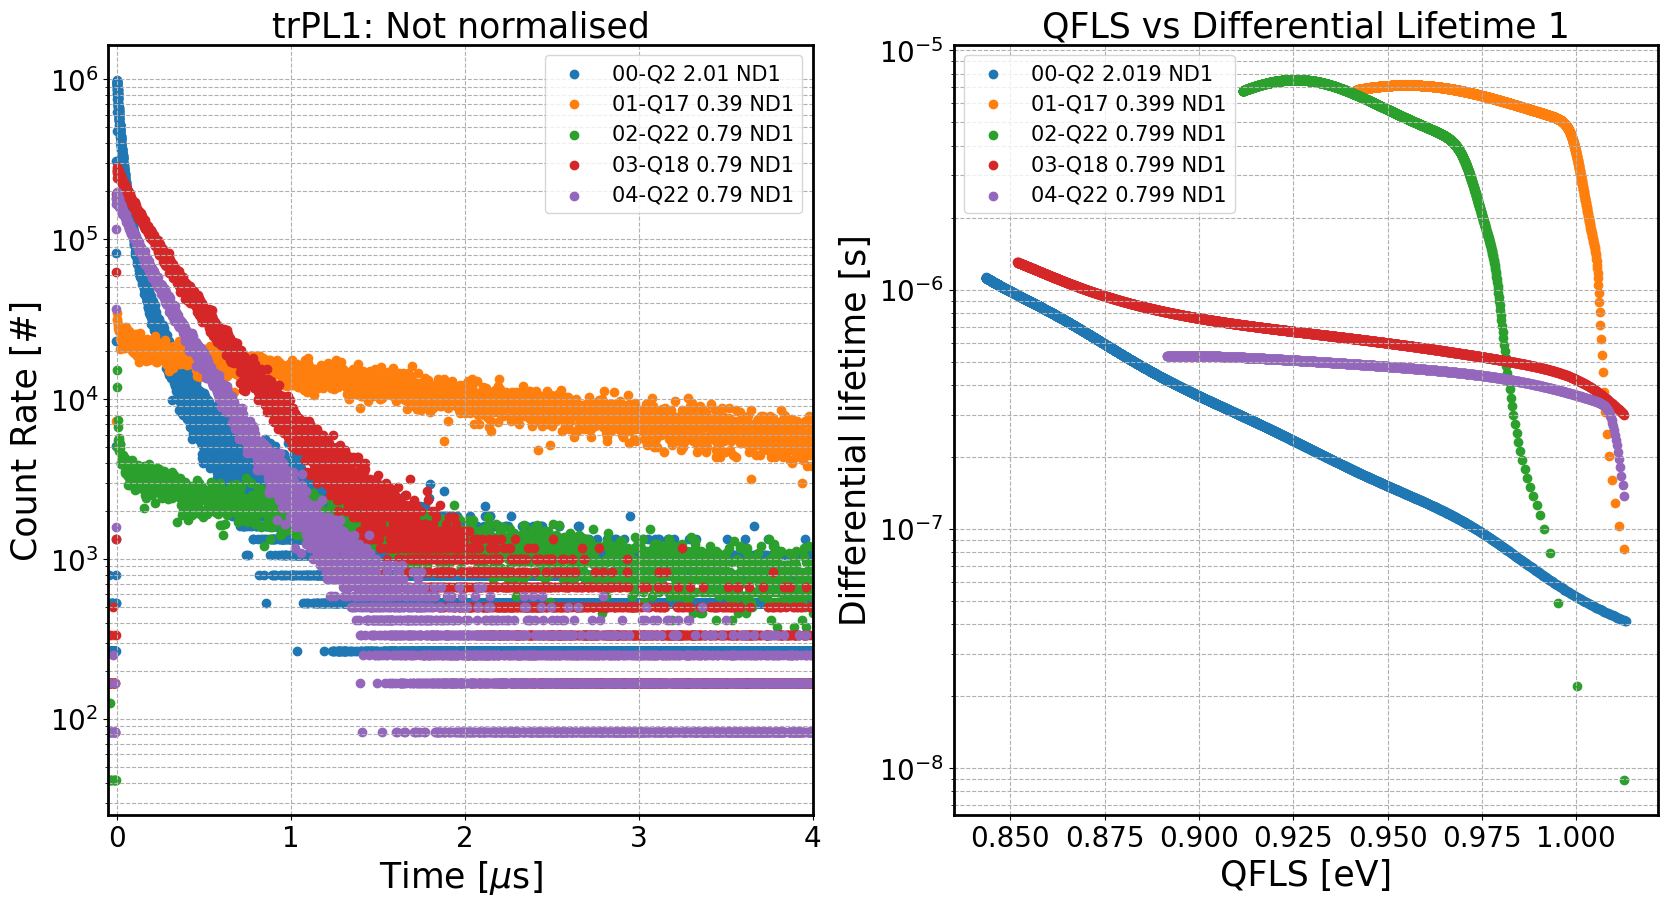

In [30]:
#Plot series
fig, ax = plt.subplots(1,2, figsize = (20,10))
selection = range(5)
for i, (sPLb) in enumerate(selection):

    ax[0].scatter(1e6*(trPLs.TRPLs_ts[:,sPLb]), trPLs.TRPLs_subsMean[:,sPLb], label = trPLs.TRPL_sample[sPLb]+" "+str(1e6*trPLs.TRPL_powers[sPLb])[:4]+" "+trPLs.TRPL_NDs[sPLb], alpha = 1)
    cutoff = 50
    ax[1].scatter((trPLs.kT*np.log((trPLs.densities[sPLb][:-1]*trPLs.densities[sPLb][:-1])/(trPLs.ni*trPLs.ni))), trPLs.diff_taus[sPLb], label = trPLs.TRPL_sample[sPLb]+" "+str(1e6*trPLs.TRPL_powers[sPLb])[:5]+" "+trPLs.TRPL_NDs[sPLb], alpha = 1)


axisTicks_fontsize = 20
axis_fontsize = 25
ax[0].set_title('trPL1: Not normalised', fontsize=25)
ax[0].set_xlim([-0.05, 4])
#ax[0].set_ylim([1e-3,1.3])
ax[0].set_xscale("linear")
ax[0].set_ylabel("Count Rate [#]", fontsize=axis_fontsize) 
ax[0].set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize) 

ax[1].set_title('QFLS vs Differential Lifetime 1', fontsize=25)
ax[1].set_xscale("linear")
ax[1].set_ylabel("Differential lifetime [s]", fontsize=axis_fontsize) 
ax[1].set_xlabel("QFLS [eV]", fontsize=axis_fontsize)
#ax[1].set_xlim([1.51, 1.6])
#ax[1].set_ylim([5e-9, 7e-8])


for i in range(2):
    
    #ax[i].set_ylim([100, 1e5])
    ax[i].set_yscale("log")#
    
    axis_fontsize = 29
    axisTicks_fontsize = 20
    ax[i].legend(fontsize = 15)
    ax[i].tick_params(axis='x', labelsize=axisTicks_fontsize)
    ax[i].tick_params(axis='y', labelsize=axisTicks_fontsize)
    ax[i].grid(visible = True, which = 'both', linestyle = '--')

    w_frame = 2
    ax[i].spines["bottom"].set_linewidth(w_frame)
    ax[i].spines["top"].set_linewidth(w_frame)
    ax[i].spines["left"].set_linewidth(w_frame)
    ax[i].spines["right"].set_linewidth(w_frame)
    
plt.savefig('./trPLs-taudiff_2107.png', bbox_inches='tight')

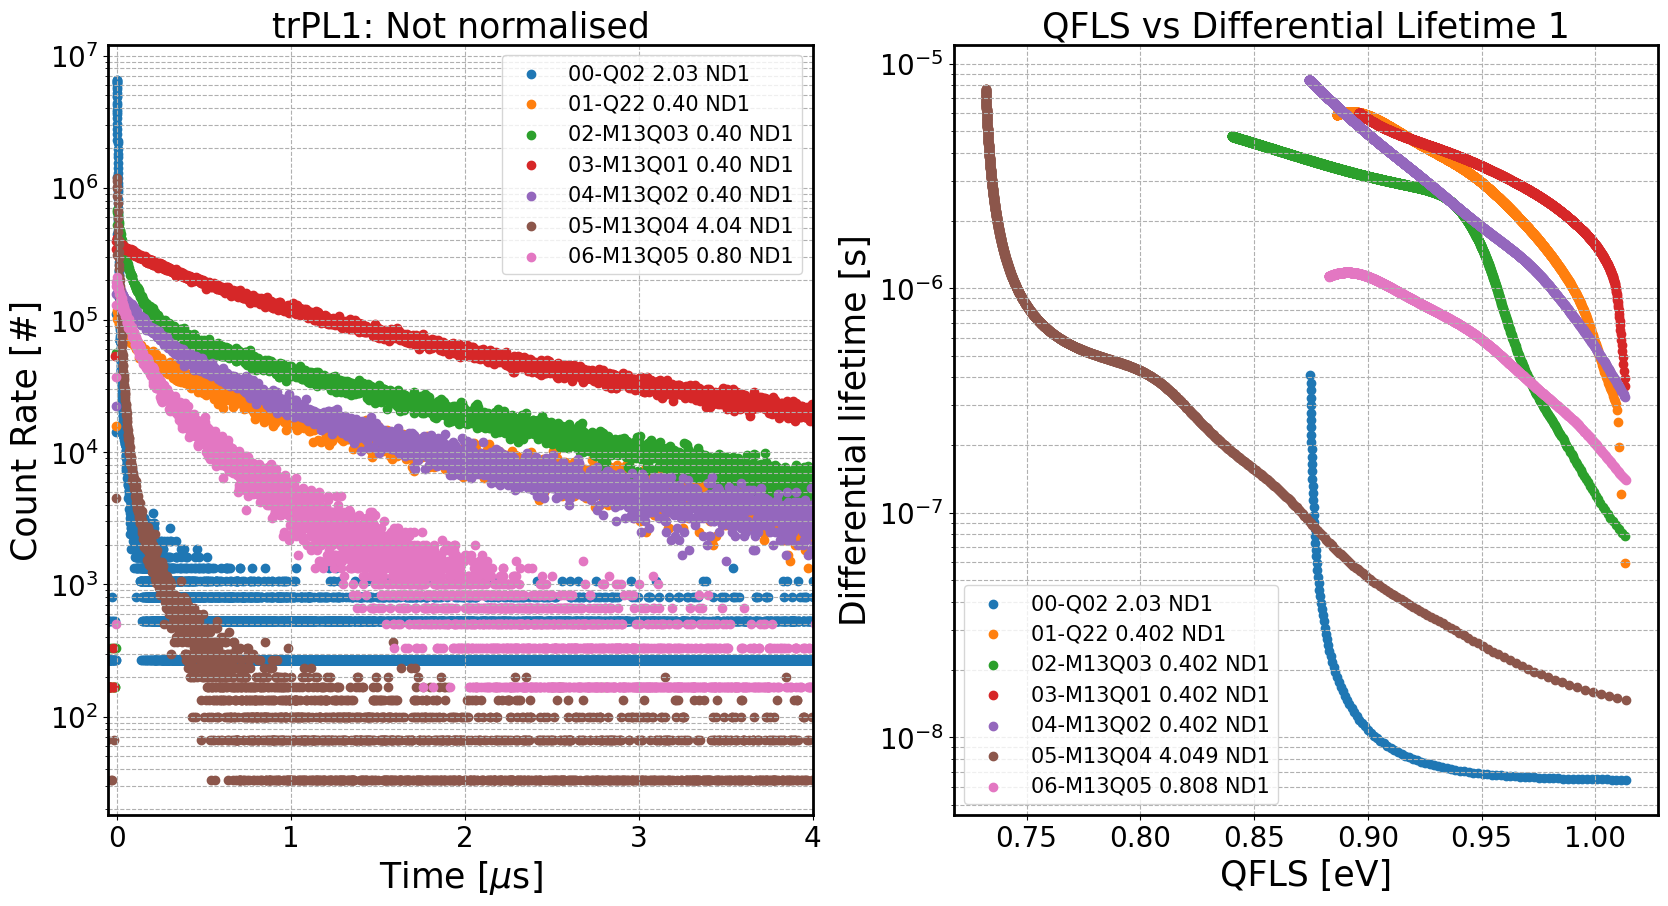

In [31]:
#Plot series
fig, ax = plt.subplots(1,2, figsize = (20,10))
selection = range(7)
for i, (sPLb) in enumerate(selection):

    ax[0].scatter(1e6*(trPLs2.TRPLs_ts[:,sPLb]), trPLs2.TRPLs_subsMean[:,sPLb], label = trPLs2.TRPL_sample[sPLb]+" "+str(1e6*trPLs2.TRPL_powers[sPLb])[:4]+" "+trPLs2.TRPL_NDs[sPLb], alpha = 1)
    cutoff = 50
    ax[1].scatter((trPLs2.kT*np.log((trPLs2.densities[sPLb][:-1]*trPLs2.densities[sPLb][:-1])/(trPLs2.ni*trPLs2.ni))), trPLs2.diff_taus[sPLb], label = trPLs2.TRPL_sample[sPLb]+" "+str(1e6*trPLs2.TRPL_powers[sPLb])[:5]+" "+trPLs2.TRPL_NDs[sPLb], alpha = 1)


axisTicks_fontsize = 20
axis_fontsize = 25
ax[0].set_title('trPL1: Not normalised', fontsize=25)
ax[0].set_xlim([-0.05, 4])
#ax[0].set_ylim([1e-3,1.3])
ax[0].set_xscale("linear")
ax[0].set_ylabel("Count Rate [#]", fontsize=axis_fontsize) 
ax[0].set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize) 

ax[1].set_title('QFLS vs Differential Lifetime 1', fontsize=25)
ax[1].set_xscale("linear")
ax[1].set_ylabel("Differential lifetime [s]", fontsize=axis_fontsize) 
ax[1].set_xlabel("QFLS [eV]", fontsize=axis_fontsize)
#ax[1].set_xlim([1.51, 1.6])
#ax[1].set_ylim([5e-9, 7e-8])


for i in range(2):
    
    #ax[i].set_ylim([100, 1e5])
    ax[i].set_yscale("log")#
    
    axis_fontsize = 29
    axisTicks_fontsize = 20
    ax[i].legend(fontsize = 15)
    ax[i].tick_params(axis='x', labelsize=axisTicks_fontsize)
    ax[i].tick_params(axis='y', labelsize=axisTicks_fontsize)
    ax[i].grid(visible = True, which = 'both', linestyle = '--')

    w_frame = 2
    ax[i].spines["bottom"].set_linewidth(w_frame)
    ax[i].spines["top"].set_linewidth(w_frame)
    ax[i].spines["left"].set_linewidth(w_frame)
    ax[i].spines["right"].set_linewidth(w_frame)
    
plt.savefig('./trPLs-taudiff2008.png', bbox_inches='tight')

In [32]:
trPLs.TRPL_savedata("./Data_trPLs2107.csv")

,time: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,trPL denoised: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,trPL normalised: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,trPL raw: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,time: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,trPL denoised: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,trPL normalised: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,trPL raw: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,time: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,trPL denoised: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,trPL normalised: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,trPL raw: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,time: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,trPL denoised: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,trPL normalised: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,trPL raw: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,time: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat,trPL denoised: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat,trPL normalised: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat,trPL raw: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat
0,-2.657500e-07,0.000000,0.000000,0,-2.660000e-07,0.000000,0.000000,0,-2.640000e-07,0.000000,0.000000,1,-2.670000e-07,0.000000,0.000000,0,-2.690000e-07,0.000000,0.000000,0
1,-2.655000e-07,266.666667,0.000268,1,-2.640000e-07,0.000000,0.000000,0,-2.620000e-07,0.000000,0.000000,1,-2.660000e-07,0.000000,0.000000,0,-2.680000e-07,0.000000,0.000000,0
2,-2.652500e-07,266.666667,0.000268,1,-2.620000e-07,0.000000,0.000000,0,-2.600000e-07,0.000000,0.000000,1,-2.650000e-07,166.666667,0.000585,1,-2.670000e-07,166.666667,0.000847,2
3,-2.650000e-07,0.000000,0.000000,0,-2.600000e-07,0.000000,0.000000,0,-2.580000e-07,0.000000,0.000000,1,-2.640000e-07,0.000000,0.000000,0,-2.660000e-07,83.333333,0.000424,1
4,-2.647500e-07,0.000000,0.000000,0,-2.580000e-07,0.000000,0.000000,0,-2.560000e-07,0.000000,0.000000,1,-2.630000e-07,166.666667,0.000585,1,-2.650000e-07,83.333333,0.000424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,7.925000e-06,533.333333,0.000537,2,6.526000e-05,0.000000,0.000000,0,6.526200e-05,-41.666667,-0.002747,0,3.249600e-05,0.000000,0.000000,0,3.249400e-05,0.000000,0.000000,0
32764,7.925250e-06,0.000000,0.000000,0,6.526200e-05,0.000000,0.000000,0,6.526400e-05,-41.666667,-0.002747,0,3.249700e-05,0.000000,0.000000,0,3.249500e-05,83.333333,0.000424,1
32765,7.925500e-06,0.000000,0.000000,0,6.526400e-05,166.666667,0.004854,1,6.526600e-05,-41.666667,-0.002747,0,3.249800e-05,0.000000,0.000000,0,3.249600e-05,0.000000,0.000000,0
32766,7.925750e-06,0.000000,0.000000,0,6.526600e-05,0.000000,0.000000,0,6.526800e-05,-41.666667,-0.002747,0,3.249900e-05,166.666667,0.000585,1,3.249700e-05,83.333333,0.000424,1


In [33]:
trPLs.diff_savedata("./TauDiff_8exponents_trPLs2107.csv")

,time: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,density: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,qfls: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,tau_diff: 00-Q2_50kHz-ND1-2.02uW-300s_0.25ns.dat,time: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,density: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,qfls: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,tau_diff: 01-Q17_10kHz-ND1-0.40uW-300s_2ns.dat,time: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,density: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,qfls: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,tau_diff: 02-Q22_20kHz-ND1-0.80uW-600s_2ns.dat,time: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,density: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,qfls: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,tau_diff: 03-Q18_20kHz-ND1-0.80uW-300s_1ns.dat,time: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat,density: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat,qfls: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat,tau_diff: 04-Q22_20kHz-ND1-0.80uW-600s_1ns.dat
0,2.500000e-10,1.295461e+15,1.013251,4.106619e-08,2.000000e-09,1.282635e+15,1.012700,8.214866e-08,2.000000e-09,1.282635e+15,1.012700,8.940706e-09,1.000000e-09,1.282635e+15,1.012700,3.003427e-07,1.000000e-09,1.282635e+15,1.012700,1.375956e-07
1,5.000000e-10,1.287599e+15,1.012914,4.127464e-08,4.000000e-09,1.251785e+15,1.011351,1.024749e-07,4.000000e-09,1.025541e+15,1.000307,2.193961e-08,2.000000e-09,1.278372e+15,1.012516,3.022653e-07,2.000000e-09,1.273347e+15,1.012297,1.520160e-07
2,7.500000e-10,1.279823e+15,1.012578,4.148508e-08,6.000000e-09,1.227591e+15,1.010270,1.282721e-07,6.000000e-09,9.361882e+14,0.995257,4.884753e-08,3.000000e-09,1.274149e+15,1.012332,3.041809e-07,3.000000e-09,1.264998e+15,1.011933,1.667114e-07
3,1.000000e-09,1.272134e+15,1.012245,4.169751e-08,8.000000e-09,1.208599e+15,1.009406,1.606359e-07,8.000000e-09,8.986313e+14,0.992989,7.913069e-08,4.000000e-09,1.269967e+15,1.012150,3.060889e-07,4.000000e-09,1.257433e+15,1.011601,1.814346e-07
4,1.250000e-09,1.264530e+15,1.011912,4.191194e-08,1.000000e-08,1.193644e+15,1.008716,2.006609e-07,1.000000e-08,8.762033e+14,0.991588,1.000185e-07,5.000000e-09,1.265825e+15,1.011969,3.079892e-07,5.000000e-09,1.250521e+15,1.011295,1.959386e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,9.985000e-07,6.047879e+13,0.843487,1.122173e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3994,9.987500e-07,6.046532e+13,0.843475,1.122481e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3995,9.990000e-07,6.045185e+13,0.843463,1.122789e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,9.992500e-07,6.043839e+13,0.843450,1.123097e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
trPLs2.TRPL_savedata("./Data_trPLs2008.csv")

,time: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL denoised: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL normalised: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL raw: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,trPL denoised: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,trPL normalised: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,trPL raw: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,time: 02-M13Q03_10kHz-ND1-0.403uW-300s_2ns.dat,trPL denoised: 02-M13Q03_10kHz-ND1-0.403uW-300s_2ns.dat,...,trPL normalised: 04-M13Q02_10kHz-ND1-0.403uW-300s_2ns.dat,trPL raw: 04-M13Q02_10kHz-ND1-0.403uW-300s_2ns.dat,time: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,trPL denoised: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,trPL normalised: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,trPL raw: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,time: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat,trPL denoised: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat,trPL normalised: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat,trPL raw: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat
0,-2.650000e-07,0.000000,0.000000,0,-2.660000e-07,0.000000,0.000000,1,-2.660000e-07,0.000000,...,0.000000,2,-2.650000e-07,0.000000,0.000000,3,-2.690000e-07,0.000000,0.000000,2
1,-2.647500e-07,0.000000,0.000000,0,-2.640000e-07,-166.666667,-0.001403,0,-2.640000e-07,0.000000,...,-0.001791,0,-2.640000e-07,-100.000000,-0.000084,0,-2.680000e-07,-333.333333,-0.001582,0
2,-2.645000e-07,0.000000,0.000000,0,-2.620000e-07,0.000000,0.000000,1,-2.620000e-07,0.000000,...,-0.001791,0,-2.630000e-07,-66.666667,-0.000056,1,-2.670000e-07,-333.333333,-0.001582,0
3,-2.642500e-07,0.000000,0.000000,0,-2.600000e-07,-166.666667,-0.001403,0,-2.600000e-07,0.000000,...,-0.000895,1,-2.620000e-07,0.000000,0.000000,3,-2.660000e-07,-333.333333,-0.001582,0
4,-2.640000e-07,266.666667,0.000041,1,-2.580000e-07,-166.666667,-0.001403,0,-2.580000e-07,0.000000,...,-0.001791,0,-2.610000e-07,-66.666667,-0.000056,1,-2.650000e-07,-333.333333,-0.001582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,7.925750e-06,0.000000,0.000000,0,6.526000e-05,-166.666667,-0.001403,0,6.526000e-05,0.000000,...,-0.000895,1,3.249800e-05,-100.000000,-0.000084,0,3.249400e-05,-333.333333,-0.001582,0
32764,7.926000e-06,0.000000,0.000000,0,6.526200e-05,-166.666667,-0.001403,0,6.526200e-05,0.000000,...,-0.001791,0,3.249900e-05,-100.000000,-0.000084,0,3.249500e-05,-333.333333,-0.001582,0
32765,7.926250e-06,0.000000,0.000000,0,6.526400e-05,0.000000,0.000000,1,6.526400e-05,0.000000,...,-0.001791,0,3.250000e-05,-100.000000,-0.000084,0,3.249600e-05,-166.666667,-0.000791,1
32766,7.926500e-06,0.000000,0.000000,0,6.526600e-05,0.000000,0.000000,1,6.526600e-05,333.333333,...,-0.001791,0,3.250100e-05,-100.000000,-0.000084,0,3.249700e-05,-333.333333,-0.001582,0


In [35]:
trPLs2.diff_savedata("./TauDiff_8exponents_trPLs2008.csv")

,time: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,density: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,qfls: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,tau_diff: 00-Q02_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,density: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,qfls: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,tau_diff: 01-Q22_10kHz-ND1-0.403uW-300s_2ns.dat,time: 02-M13Q03_10kHz-ND1-0.403uW-300s_2ns.dat,density: 02-M13Q03_10kHz-ND1-0.403uW-300s_2ns.dat,...,qfls: 04-M13Q02_10kHz-ND1-0.403uW-300s_2ns.dat,tau_diff: 04-M13Q02_10kHz-ND1-0.403uW-300s_2ns.dat,time: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,density: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,qfls: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,tau_diff: 05-M13Q04_100kHz-ND1-4.05uW-300s_1ns.dat,time: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat,density: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat,qfls: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat,tau_diff: 06-M13Q05_20kHz-ND1-0.808uW-300s_1ns.dat
0,2.500000e-10,1.301875e+15,1.013525,6.458912e-09,2.000000e-09,1.292255e+15,1.013114,5.949245e-08,2.000000e-09,1.292255e+15,...,1.013114,3.272726e-07,1.000000e-09,1.298668e+15,1.013388,1.469715e-08,1.000000e-09,1.295461e+15,1.013251,1.399975e-07
1,5.000000e-10,1.252447e+15,1.011380,6.462488e-09,4.000000e-09,1.249534e+15,1.011252,1.211795e-07,4.000000e-09,1.259725e+15,...,1.012775,3.315644e-07,2.000000e-09,1.213245e+15,1.009619,1.497016e-08,2.000000e-09,1.286241e+15,1.012856,1.414931e-07
2,7.500000e-10,1.204921e+15,1.009237,6.466354e-09,6.000000e-09,1.229081e+15,1.010337,1.961152e-07,6.000000e-09,1.229168e+15,...,1.012441,3.358734e-07,3.000000e-09,1.134848e+15,1.005918,1.526527e-08,3.000000e-09,1.277182e+15,1.012464,1.429969e-07
3,1.000000e-09,1.159226e+15,1.007095,6.470533e-09,8.000000e-09,1.216610e+15,1.009772,2.535437e-07,8.000000e-09,1.200447e+15,...,1.012111,3.401981e-07,4.000000e-09,1.062889e+15,1.002289,1.558351e-08,4.000000e-09,1.268282e+15,1.012077,1.445085e-07
4,1.250000e-09,1.115291e+15,1.004955,6.475051e-09,1.000000e-08,1.207051e+15,1.009335,2.859172e-07,1.000000e-08,1.173432e+15,...,1.011786,3.445372e-07,5.000000e-09,9.968256e+14,0.998734,1.592584e-08,5.000000e-09,1.259536e+15,1.011693,1.460276e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,NaN,NaN,NaN,NaN,6.988000e-06,1.312064e+14,0.886393,5.920476e-06,6.988000e-06,5.699799e+13,...,0.874156,8.463481e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3494,NaN,NaN,NaN,NaN,6.990000e-06,1.311621e+14,0.886375,5.919460e-06,6.990000e-06,5.697397e+13,...,0.874143,8.466080e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3495,NaN,NaN,NaN,NaN,6.992000e-06,1.311177e+14,0.886356,5.918442e-06,6.992000e-06,5.694996e+13,...,0.874130,8.468680e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,NaN,NaN,NaN,NaN,6.994000e-06,1.310734e+14,0.886337,5.917420e-06,6.994000e-06,5.692597e+13,...,0.874117,8.471281e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
